<a href="https://colab.research.google.com/github/caiobmbr/datascience-projects/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo"  width="80%" src="https://raw.githubusercontent.com/caiobmbr/datascience-projects/master/banner_v1.0.png">

**Data Science na Prática 2.0.**
by [Caio Melo](https://github.com/caiobmbr/datascience-projects)

# Panorama do COVID-19 no Brasil
---
COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="80%" src="https://images.unsplash.com/photo-1584036561566-baf8f5f1b144?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1189&q=80"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, especialmente devido à não estarmos em tendência de redução de casos, iremos analisar os dados públicos da doença.
  

## Obtenção dos Dados

Dados sobre a COVID-19 são um desafio por si só devido à dificuldade de alinhamento entre a forma de apuração dos dados e cálculo das métricas entre os países. Não existe um direcionamento único para todos os países em relação à contabilização dos casos, até por ser uma situação sem precedentes na nossa história recente. Alia-se à essa situação a **baixa quantidade de testes da doença** que alguns países estão executando, o que ajuda a distorcer análises sobre a situação

Para tentar minizar esse conflito entre os dados no caso do Brasil, o Ministério da Saúde criou o [Painel Coranavírus Brasil](https://covid.saude.gov.br/), que foi desenvolvido para ser o veículo oficial de comunicação sobre a situação epidemiológica da COVID-19 no Brasil. Diariamente, o Ministério da Saúde, por meio da Secretaria de Vigilância em Saúde (SVS/MS) divulga dados consolidados sobre o COVID-19.

Contudo, o painel só trata da situação do Brasil e para nossa análise precisaremos comparar o nosso país em relação aos outros países do mundo. Portanto, nossa base de dados utilizada será a da [*Our World in Data*](https://ourworldindata.org/coronavirus), que apresenta dados e análises em um panorama global. A organização possui um [repositório no Github](https://github.com/owid/covid-19-data/tree/master/public/data) que será de onde iremos extrair nosso *dataset*.

### Dicionário de Variáveis

Acessando o repositório no Github da *Our World Data*, conseguimos ter acesso ao seguinte dicionário de variáveis, presente no arquivo [owid-covid-codebook.csv](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv):

* `iso_code` - ISO 3166-1 alpha-3 - código dos países padrão três letras
* `continent` - Continente da localização geográfica
* `location` - Localização geográfica
* `date` - Data de observação
* `total_cases` - Total de casos confirmados de COVID-19
* `new_cases` - Novos casos confirmados de COVID-19
* `new_cases_smoothed` - Novos casos confirmados de COVID-19 (7 dias suavizado)
* `total_deaths` - Total de mortes atribuídas a COVID-19
* `new_deaths` - Novas mortes atribuídas a COVID-19
* `new_deaths_smoothed` - Novas mortes atribuídas a COVID-19 (7 dias suavizado)
* `total_cases_per_million` - Total de casos confirmados de COVID-19 por 1.000.000 de pessoas
* `new_cases_per_million` - Novos casos confirmados de COVID-19 por 1.000.000 de pessoas
* `new_cases_smoothed_per_million` - Nova casos confirmados de COVID-19 (7 dias suavizado) por 1.000.000 de pessoas
* `total_deaths_per_million` - Total de mortes atribuídas a COVID-19 por 1.000.000 de pessoas
* `new_deaths_per_million` - Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
* `new_deaths_smoothed_per_million` - Novas mortes atribuídas a COVID-19 (7 dias suavizado) por 1.000.000 de pessoas
* `total_tests` - Total de testes para COVID-19
* `new_tests` - Novos testes para COVID-19
* `new_tests_smoothed` - Novos testes para COVID-19 (7 dias suavizado)
* `total_tests_per_thousand` - Total de testes para COVID-19 por 1.000 pessoas
* `new_tests_per_thousand` - Novos testes para COVID-19 por 1.000 pessoas
* `new_tests_smoothed_per_thousand` - Novos testes para COVID-19 (7 dias suavizado) por 1.000 pessoas
* `tests_per_case` - Testes realizados por novo caso confirmado de COVID-19, dado como média móvel de 7 dias (este é o inverso da positive_rate)
* `positive_rate` - Parte dos testes de COVID-19 que são positivos, dado como uma média móvel de 7 dias (este é o inverso da variável tests_per_case)
* `tests_units` - Unidades usadas pela localização para relatar seus dados de testes
* `stringency_index` - Índice de Resposta Restritiva Governamental: medida composta com base em 9 indicadores de resposta incluíndo o fechamento de escolas, fechamento de locais de trabalho, e proibição de viajar, escalonados para um valor de 0 a 100 (100 = resposta mais estrita)
* `population` - População em 2020
* `population_density` - Número de pessoas divididas por área de terra, medido em quilômetros quadrados, em anos mais recentes disponíveis
* `median_age` - Idade média da população, projeção das Nações Unidas para 2020
* `aged_65_older` - Parcela da população que é de 65 anos ou mais velhos, em anos mais recentes disponíveis
* `aged_70_older` - Parcela da população que é de 70 anos ou mais em 2015
* `gdp_per_capita` - Produto interno bruto em paridade de poder aquisitivo (constantes de dólares internacionais em 2011), em anos mais recentes disponíveis
* `extreme_poverty` - Parcela da população vivendo em extrema pobreza, dos anos mais recentes disponíveis desde 2010
* `cardiovasc_death_rate` - Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)
* `diabetes_prevalence` - Prevalência de diabetes (% da população com idades entre 20 a 79) em 2017
* `female_smokers` - Parcela de mulheres que fumam, dos anos mais recentes disponíveis
* `male_smokers` - Parcela de homens que fumam, dos anos mais recentes disponíveis
* `handwashing_facilities` - Parcela da população com instalações básicas de lavagem das mãos básicas de fácil acesso, dos anos mais recentes disponíveis
* `hospital_beds_per_thousand` - Leitos hospitalares por 1.000 pessoas, dos anos mais recentes disponíveis desde 2010
* `life_expectancy` - Expectativa de vida ao nascer em 2019

### Importando os dados do COVID-19

Iremos iniciar a nossa análise importando as bibliotecas necessárias e o arquivo .csv da *Our World Data* encontrado [neste link.](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv)

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importando os dados para o dataframe
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Inicialmente precisamos conhecer o nosso dataframe em questão. Portanto, iremos utilizar alguns métodos para nos situarmos melhor sobre o formato e conteúdo que estamos analisando.

In [3]:
# visualizando as cinco primeiro entradas do dataframe
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


### Tamanho e variáveis do dataframe

Vamos analisar quantos registros nosso dataframe possuí, quantas variáveis e quais os tipos das mesmas.

In [4]:
# verificando o tamanho de entradas e variáveis do dataframe
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# apresentando nome e tipo das variáveis
df.info()

Entradas:	39482
Variáveis:	40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39482 entries, 0 to 39481
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         39243 non-null  object 
 1   continent                        39004 non-null  object 
 2   location                         39482 non-null  object 
 3   date                             39482 non-null  object 
 4   total_cases                      38906 non-null  float64
 5   new_cases                        38731 non-null  float64
 6   new_cases_smoothed               37950 non-null  float64
 7   total_deaths                     38906 non-null  float64
 8   new_deaths                       38731 non-null  float64
 9   new_deaths_smoothed              37950 non-null  float64
 10  total_cases_per_million          38667 non-null  float64
 11  new_cases_per_million            38667 non-null  

Analisando o resultado do método `info()`, percebe-se que a variável `date` está em um formato *object*. Portanto, precisamos realizar a alteração para o tipo *datetime*.

In [5]:
df.date = pd.to_datetime(df.date)

### Avaliação sobre valores ausentes

Nesse momento, precisamos avaliar qual a situação do *dataframe* em relação à valores ausentes. Para isso, iremos calcular o percentual de de valores ausentes por varíavel, além de gerar uma matriz de preenchimento dos dados, adicionando assim um recurso visual para avaliação desse aspecto.

In [6]:
# percentual de valores ausentes por variável
(100*df.isnull().sum()/df.shape[0]).round(2).sort_values(ascending=False)

new_tests_per_thousand             68.00
new_tests                          68.00
total_tests                        67.16
total_tests_per_thousand           67.16
tests_per_case                     66.78
positive_rate                      65.88
new_tests_smoothed                 64.03
new_tests_smoothed_per_thousand    64.03
tests_units                        62.12
handwashing_facilities             58.58
extreme_poverty                    41.07
male_smokers                       30.40
female_smokers                     29.53
hospital_beds_per_thousand         18.99
stringency_index                   17.28
aged_65_older                      11.97
gdp_per_capita                     11.76
aged_70_older                      11.12
median_age                         10.66
cardiovasc_death_rate              10.63
diabetes_prevalence                 7.52
population_density                  5.02
new_deaths_smoothed_per_million     4.04
new_cases_smoothed_per_million      4.04
new_cases_smooth

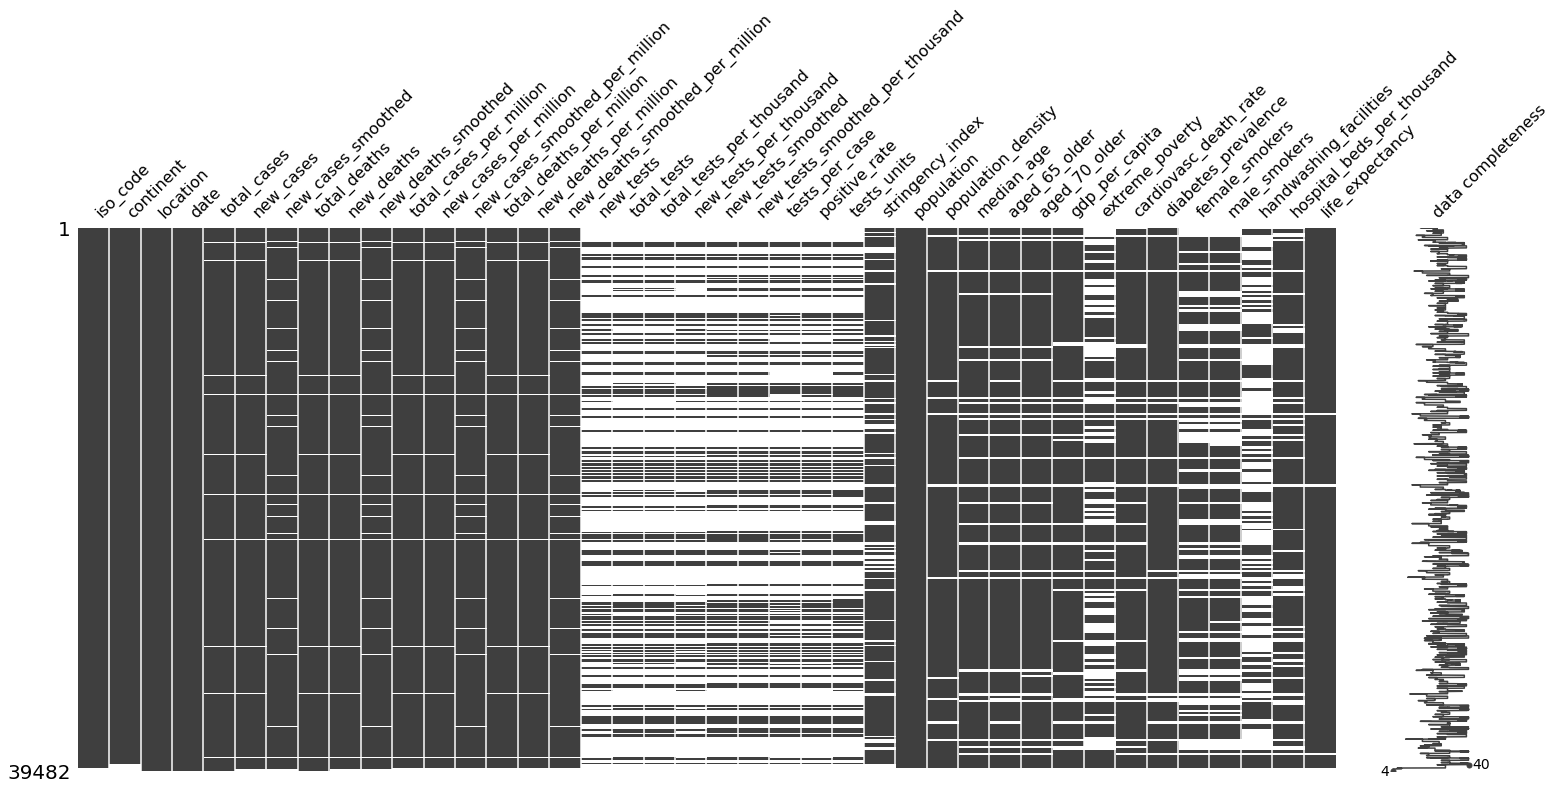

In [7]:
# plotando a matriz de valores ausentes
msno.matrix(df,labels=True)
plt.show()

Neste caso, a matriz de valores ausentes apresenta um insight muito interessante. As variáveis que apresentam a maior quantidade de valores faltantes estão relacionadas à testes da doença, o que seria um forte indício sobre a **fragilidade de informação e/ou ausência de execução de testes** para o COVID-19, fator crítico para se ter uma análise completa da situação em prol de tomadas de decisão mais assertivas para a contenção da doença.



### Total de casos confirmados (Ago/2020)

Vamos agora avaliar quais são os três piores países em termos de total de casos confirmados de COVID-19.

In [10]:
df.loc[df.date == '2020-08-25'].sort_values(by="total_cases", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
39242,OWID_WRL,NaN,World,2020-08-25,23673902.0,212793.0,252749.714,813944.0,4487.0,5624.000,3037.141,27.299,32.425,104.421,0.576,0.722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58
36980,USA,North America,United States,2020-08-25,5740909.0,38298.0,43226.286,177279.0,473.0,968.857,17343.997,115.703,130.592,535.582,1.429,2.927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86
5331,BRA,South America,Brazil,2020-08-25,3622861.0,17078.0,37613.000,115309.0,565.0,967.571,17043.993,80.345,176.953,542.479,2.658,4.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88
17076,IND,Asia,India,2020-08-25,3167323.0,60975.0,66368.714,58390.0,848.0,941.857,2295.154,44.185,48.093,42.311,0.614,0.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.63,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66
30860,RUS,Europe,Russia,2020-08-25,961493.0,4744.0,4821.143,16448.0,65.0,101.143,6588.526,32.508,33.036,112.708,0.445,0.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58


Como visto acima, a primera linha representa um totalizador de todos os países, representando o mundo como um todo. Para esse momento da análise, não há necessidade de excluirmos as entradas referentes à essa categoria mas é algo para mantermos a atenção. 

No dia desta análise, 25 de Agosto de 2020, os três piores países em termos de total de casos confirmados de COVID-19 são:

* **Estados Unidos:** 5.740.909 casos
* **Brasil:** 3.622.861 casos
* **Índia:** 3.167.323 casos

## TO-DO LIST

* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


Vamos......

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*